In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier

from sklearn.inspection import DecisionBoundaryDisplay

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Reading data

In [3]:
dat = pd.read_csv('ch22m50 (3).csv')
dat.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,y
0,16.920655,-42.645832,120.989582,204.158654,146.482712,10.931416,-148.843296,27.660603,-84.502239,12.294844,...,-62.325705,38.713472,-35.038464,-9.714632,36.987391,8.891164,-434.626733,42.773671,217.002701,3
1,33.112697,141.934286,-42.908480,272.840275,3.240221,2.900615,83.384757,38.419407,5.996595,-74.794468,...,-63.303622,69.658188,50.411234,-14.496756,62.013898,23.602845,-56.753575,55.810014,132.221649,1
2,-0.719035,162.356669,-25.289948,-38.063813,-45.747704,-1.768817,-34.906378,19.047969,-122.525011,37.495460,...,19.455654,99.033783,-14.787519,-2.837963,80.574733,37.568538,-55.843178,24.805701,-66.399042,1
3,41.114839,32.865930,3.375600,248.982501,145.736013,0.144523,-100.467590,-14.692076,-224.750326,5.088222,...,28.051349,-69.535135,6.634928,-0.086851,243.915623,-42.572195,349.780139,22.955581,115.350261,2
4,-98.954896,100.334688,22.108893,-509.285564,77.418419,-2.567594,27.837708,41.203306,195.284077,-47.101180,...,103.337332,100.588271,-40.951918,3.262511,174.265657,38.307570,-363.908029,52.254404,362.320497,1


In [4]:
# Separating Features and Label from the dataset
X = dat.loc[:, 'x_0':'x_28']
Y = dat.loc[:,'y']

print('Feature-> ', (X.isna().sum()).sum())
print('Label-> ', Y.isna().sum())

# Standard normal scaling of the Features
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 50)

Feature->  0
Label->  0


In [5]:
# Reusing result generation function from the tutorial

def classification(mod, pred, name):
    rep = classification_report(y_test, pred)
    print("\nThe classification report for " + name + " is:", rep, sep = "\n")
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, annot = True, cmap = 'Spectral', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

# Q1-> Classify the dataset using Logistic regression. Also implement the LDA and QDA and find the model performance

The accuracy for Logistic Regression is: 55.33980582524271 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.50      0.08      0.13        13
           1       0.62      0.90      0.73        50
           2       0.48      0.42      0.45        26
           3       0.00      0.00      0.00        14

    accuracy                           0.55       103
   macro avg       0.40      0.35      0.33       103
weighted avg       0.48      0.55      0.49       103



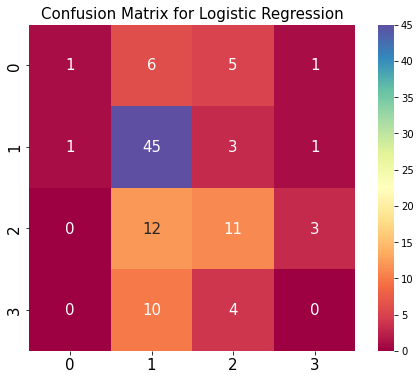

In [6]:
# Q1.1-> Logistic Regression:

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = lr.score(X_test, y_test)
print("The accuracy for Logistic Regression is:", acc_lr * 100, "%")
classification(lr, y_pred, 'Logistic Regression')


The accuracy for Linear Discriminant Analysis is: 53.398058252427184 %

The classification report for LDA is:
              precision    recall  f1-score   support

           0       0.33      0.08      0.12        13
           1       0.59      0.88      0.71        50
           2       0.48      0.38      0.43        26
           3       0.00      0.00      0.00        14

    accuracy                           0.53       103
   macro avg       0.35      0.34      0.32       103
weighted avg       0.45      0.53      0.47       103



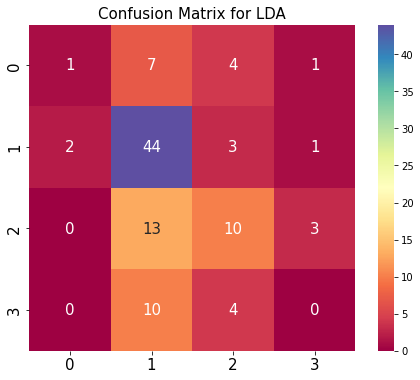

In [7]:
# Q1.2-> Linear Discriminant Analysis:

lda=LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
acc_lda = lda.score(X_test, y_test)
print('The accuracy for Linear Discriminant Analysis is:', acc_lda * 100, '%')
classification(lda, y_pred, 'LDA')

The accuracy for Quadratic Discriminant Analysis is: 52.42718446601942 %

The classification report for QDA is:
              precision    recall  f1-score   support

           0       0.20      0.08      0.11        13
           1       0.63      0.80      0.71        50
           2       0.45      0.35      0.39        26
           3       0.27      0.29      0.28        14

    accuracy                           0.52       103
   macro avg       0.39      0.38      0.37       103
weighted avg       0.48      0.52      0.49       103



C:\Users\91994\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


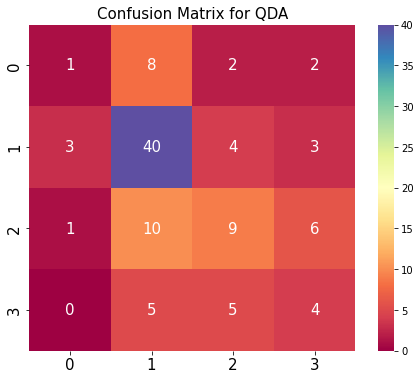

In [8]:
# Q1.3-> Quadratic Discriminant Analysis:

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
acc_qda = qda.score(X_test, y_test)
print('The accuracy for Quadratic Discriminant Analysis is:', acc_qda * 100, '%')
classification(qda, y_pred, 'QDA')

In [9]:
# Trying to remove multicollinearity
#result = permutation_importance(qda, X_train, y_train, n_repeats=10, random_state=42)
#perm_sorted_idx = result.importances_mean.argsort()

#plt.figure(figsize=(40,25))
#plt.bar(height = perm_sorted_idx, x = ['x_'+str(i) for i in range(0,28)])


In [10]:
# Checking collinearity using correlation heatmap
#df = pd.DataFrame(data=X_train, columns=['x_'+str(i) for i in range(0,28)], index=[i for i in range(len(X_train[:,0]))])

#plt.figure(figsize = (30, 30))
#sns.heatmap(df.corr(), annot = True, cmap = 'Spectral', annot_kws = {'size': 15}, square = True)

In [11]:
#X_vif = df[list(df.columns[:])]
#X_vif.describe()

In [12]:
#vif_info = pd.DataFrame()
#vif_info['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
#vif_info['Column'] = X_vif.columns
#vif_info.sort_values('VIF', ascending=False)

# Q1-> Conclusions:

The Accuracy score obtained using QDA on the train dataset is the greatest with 52.42% followed by LDA with 47.58% and finally for Logistic Regression with 45.16%

# Q2-> Use the Decision tree classifier to classify the given dataset. Tune the model and identify the optimal hyperparameters.

In [13]:
# utility function to plot the progress of decision tree training
def plot_DT_progress(x,y,n_steps):
  
  fig,ax = plt.subplots(n_steps, figsize=(5*n_steps,5*n_steps))
  ax2=ax.flatten()
  for i in range(n_steps):
    model = DecisionTreeClassifier(max_depth=i+1).fit(x,y)
    plot_tree(model,ax=ax2[i*1])
    

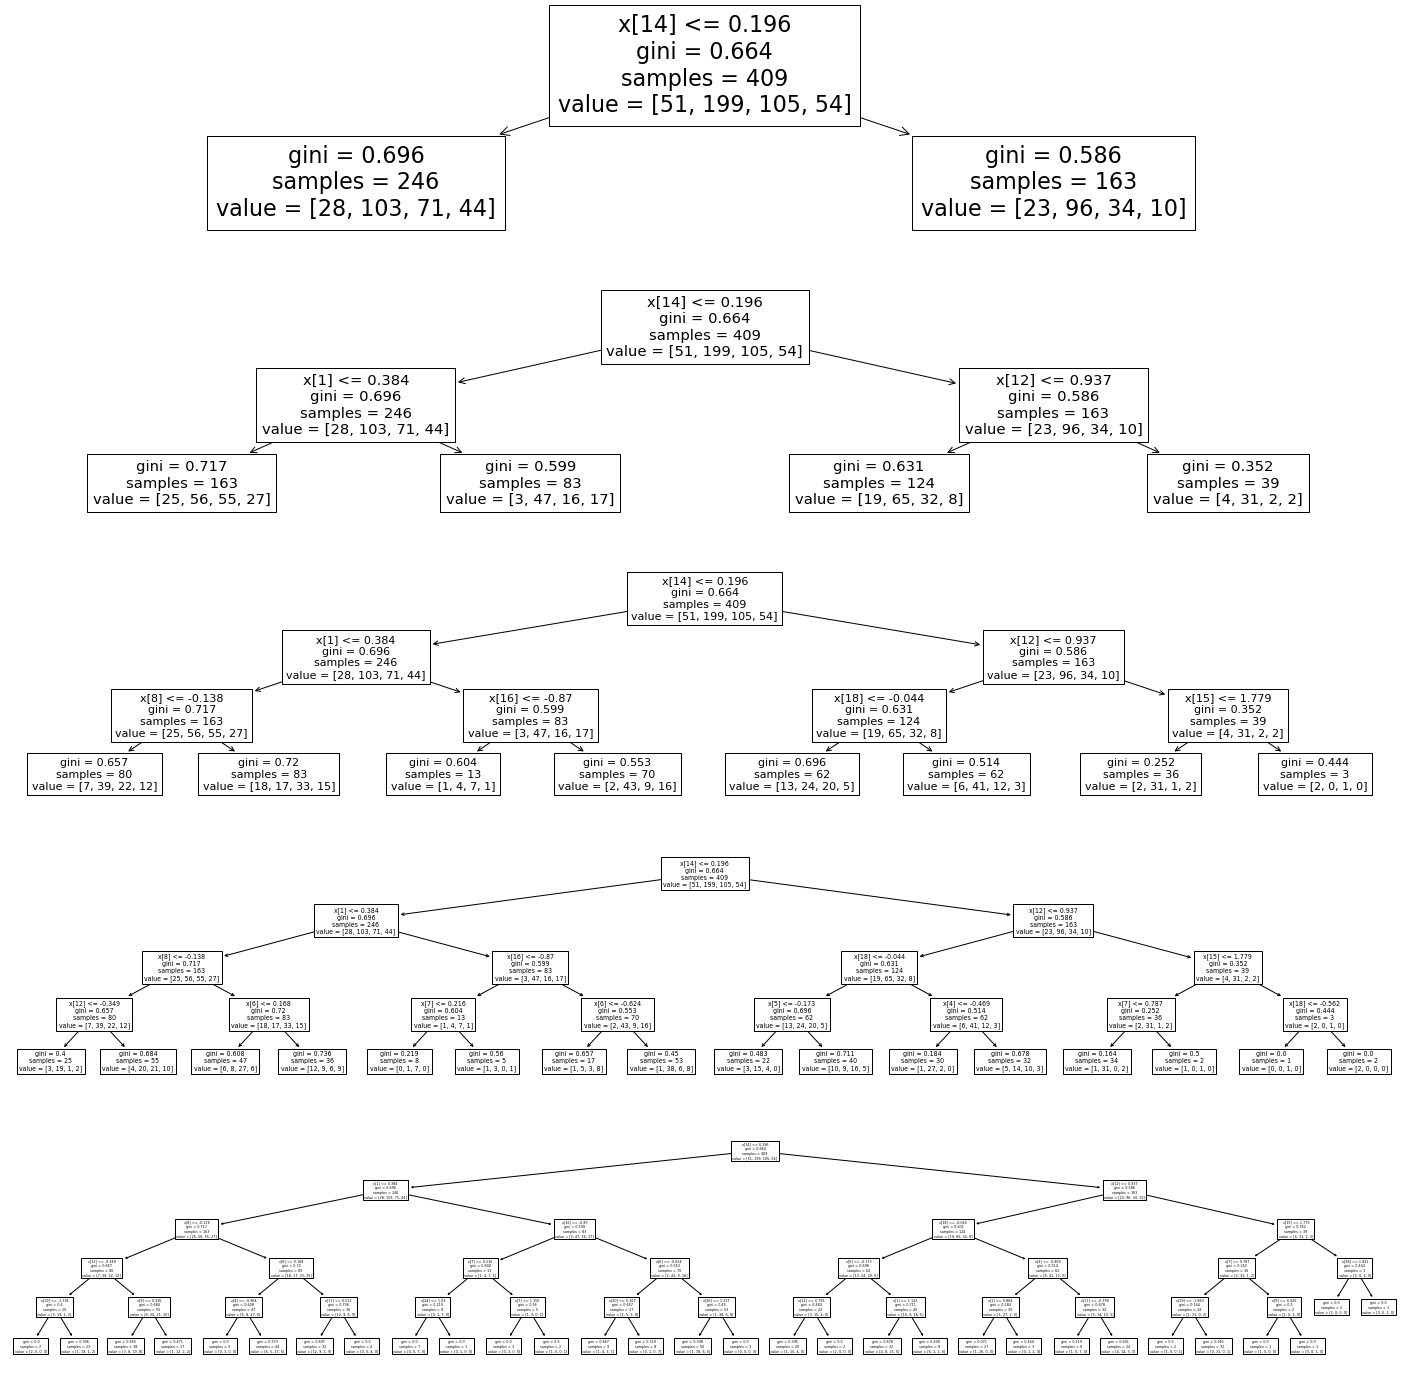

In [14]:
plot_DT_progress(X_train, y_train, 5)

In [15]:
# Model performance on test data-> Accuracy Score

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

ypred_DT = model_DT.predict(X_test)

acc_score_DT = accuracy_score(y_test, ypred_DT)
print(acc_score_DT*100)

39.80582524271845


In [16]:
# DT hyperparameter tuning

DT_CV = DecisionTreeClassifier()
param_choice = {
    "max_leaf_nodes": np.linspace(10,50,30).astype(int),
    "max_depth": list(range(3,15))
}
GS_DT = GridSearchCV(DT_CV, param_choice,n_jobs=-1, cv=5)

GS_DT.fit(X_train, y_train)

print(GS_DT.best_estimator_)


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=19)


In [17]:
ypred_GS_DT = GS_DT.predict(X_test)
acc_score_DTCV = accuracy_score(y_test, ypred_GS_DT)
print(acc_score_DTCV*100)

44.66019417475729


# Q2-> Conclusions:
 
 1. Without hyper-parameter tuning the Decision Tree's accuracy score is 45.967% on the training dataset.
 2. After hyper-parameter tuning using Grid Search CV: 
     2.1 Best parameters to train the model with are-> max_depth = 7, max_leaf_n odes = 10.
     2.2   

# Q3-> Classify the dataset using Bagging Classifier and Random Forest classifier models. Tune the model for the best hyperparmeters

In [18]:
# Bagging Classifier: Model fitting and Accuracy Score
n_est = 100
model_BC=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n_est)

model_BC.fit(X_train, y_train)
ypred_BC = model_BC.predict(X_test)
acc_score_BC = accuracy_score(y_test, ypred_BC)
print(acc_score_BC*100)

54.36893203883495


In [19]:
# Hyperparameter tuning

param_choice = {
    "estimator__max_leaf_nodes": np.linspace(10,50,30).astype(int),
    "estimator__max_depth": list(range(3,10)),
    "n_estimators": list(range(10,110,10))
}
GS_BC = GridSearchCV(model_BC, param_choice,n_jobs=-1, cv=5)

GS_BC.fit(X_train, y_train)

print(GS_BC.best_estimator_)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=9,
                                                   max_leaf_nodes=44),
                  n_estimators=60)


In [20]:
# Accuracy Score of the hypertuned GS BC model:

ypred_GS_BC = GS_BC.predict(X_test)
acc_score_GSBC = accuracy_score(y_test, ypred_GS_BC)
print(acc_score_GSBC*100)

55.33980582524271


In [21]:
# Random Forest Classifier: Model fitting and Accuracy Score
n_est = 100
model_RF=RandomForestClassifier(n_estimators=n_est)

model_RF.fit(X_train, y_train)
ypred_RF = model_RF.predict(X_test)
acc_score_RF = accuracy_score(y_test, ypred_RF)
print(acc_score_RF*100)

51.45631067961165


In [22]:
# Hyperparameter tuning

param_choice = {
    "max_leaf_nodes": np.linspace(10,50,30).astype(int),
    "max_depth": list(range(3,10)),
    "n_estimators": list(range(10,110,10))
}
GS_RF = GridSearchCV(model_RF, param_choice,n_jobs=-1, cv=5)

GS_RF.fit(X_train, y_train)

print(GS_RF.best_estimator_)

RandomForestClassifier(max_depth=9, max_leaf_nodes=50, n_estimators=60)


In [23]:
# Accuracy Score of the hypertuned GS RF model:

ypred_GS_RF = GS_RF.predict(X_test)
acc_score_GSRF = accuracy_score(y_test, ypred_GS_RF)
print(acc_score_GSRF*100)

55.33980582524271


# Q4-> Compare the models and elaborate on your findings

In [24]:
# Accuracy Plot comparison

def acc_plot(train_acc,test_acc,models):
  
  n_bars = len(train_acc)
  x1 = np.arange(1,(n_bars)*2,2)
  x2 = np.arange(1,(n_bars)*2,2)+0.6
  plt.bar(x1,train_acc,color='b',label='Train',width=0.6)
  plt.bar(x2,test_acc,color='r',label='Test',width=0.6)
  plt.xticks(ticks=x1+0.3,labels=models)
  plt.xlabel('Models')
  plt.ylabel('Accuracies')
  plt.legend();

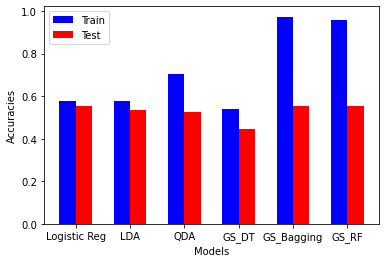

In [25]:
data = [X_test,y_test,X_train,y_train]
models = [lr, lda, qda, GS_DT, GS_BC,GS_RF]
model_names=['Logistic Reg', 'LDA', 'QDA', 'GS_DT','GS_Bagging','GS_RF']
train_acc,test_acc=[],[]
for j in models:
  acc = accuracy_score(data[3],j.predict(data[2]))
  train_acc.append(acc)
  acc = accuracy_score(data[1],j.predict(data[0]))
  test_acc.append(acc)
acc_plot(train_acc,test_acc,model_names);